In [1]:
import pickle 
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
df=pickle.load(open('bigdata.pkl','rb'))

In [3]:
model_lstm = load_model('model_lstm.h5')

In [4]:
def Make_Tuple(res,output_lst):
    tuple_lst = list()
    for tup in range(len(res)):
        inner = res[tup]
        outer = output_lst[inner]
        tuple_lst.append([inner,outer])
        
    return tuple_lst
        

In [5]:
def Predict_Classes(number,N = 6):
    output_lst = model_lstm.predict([number])
    output_lst = list(output_lst[0])
  
    res = sorted(range(len(output_lst)), key = lambda sub: output_lst[sub])[-N:] 

    print("Indices list of max "+ str(N) +" elements is : " + str(res))
    
    result_tuples = Make_Tuple(res,output_lst)
    
    return result_tuples,res
    

In [6]:
def Plot_Graph(output):
    X_graph = list()
    y_graph = list()
    for i in range(len(output)):
        X_graph.append(output[i][0])
        y_graph.append(output[i][1])
        
    plt.scatter(X_graph,y_graph)
    plt.show()
        
    

Indices list of max 6 elements is : [11, 32, 6, 27, 10, 25]


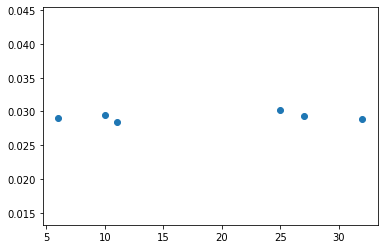

In [7]:
output,res = Predict_Classes(1)
Plot_Graph(output)

In [8]:
def Input_Here():
    number = int(input("Enter a Number: "))
    choice = input("You want to select the count of probablitic next number?\n*Default is 6*\nIf yes press Y else N: ").lower()
    if choice=='y':
        future_count = int(input("Count of top probability of next number: "))
        output,res = Predict_Classes(number,future_count)
    else:
        output,res = Predict_Classes(number)
    for i in range(len(output)):
        num =output[i][0]
        prob = output[i][1]*100
        print("Probability of "+str(num) + " is " + str(prob))
    return output

In [9]:
inp = Input_Here()

Enter a Number: 2
You want to select the count of probablitic next number?
*Default is 6*
If yes press Y else N: n
Indices list of max 6 elements is : [30, 20, 13, 27, 14, 6]
Probability of 30 is 2.780841663479805
Probability of 20 is 2.812729775905609
Probability of 13 is 2.8210796415805817
Probability of 27 is 2.8347477316856384
Probability of 14 is 2.8475120663642883
Probability of 6 is 2.940816432237625


In [9]:
def User_Input():
    cond = True
    while(cond):
        ch = input("Do you want to input?\nIf yes press Y else N: ").lower()
        if ch == 'y':
            Input_Here()
            cond = True
        elif ch == 'n':
            cond = False
        elif ch!= 'y':
            cond = False
           

In [11]:
User_Input()

Do you want to input?
If yes press Y else N: y
Enter a Number: 29
You want to select the count of probablitic next number?
*Default is 6*
If yes press Y else N: n
Indices list of max 6 elements is : [10, 14, 30, 34, 6, 27]
Probability of 10 is 2.8511127457022667
Probability of 14 is 2.8518954291939735
Probability of 30 is 2.8534220531582832
Probability of 34 is 2.8589682653546333
Probability of 6 is 2.88176778703928
Probability of 27 is 2.953251078724861
Do you want to input?
If yes press Y else N: y
Enter a Number: 18
You want to select the count of probablitic next number?
*Default is 6*
If yes press Y else N: n
Indices list of max 6 elements is : [13, 34, 3, 27, 22, 5]
Probability of 13 is 2.9294634237885475
Probability of 34 is 2.946774661540985
Probability of 3 is 2.9468297958374023
Probability of 27 is 2.995835989713669
Probability of 22 is 3.0635323375463486
Probability of 5 is 3.0668679624795914
Do you want to input?
If yes press Y else N: y
Enter a Number: 18
You want to selec